# Principaux circuits combinatoires

[Vidéo d'aide sur cette partie - n'est utile qu'après une première lecture...](https://vimeo.com/415196263)

On parle de **circuit combinatoire** lorsque la (ou les) sortie(s) du circuit *ne dépendent que de ses valeurs d'entrées*.

En effet, il existe aussi des **circuits séquentiels**: leurs sorties dépendent des valeurs d'entrées «courantes» *et aussi* de l'état dans lequel se trouve le circuit suites aux entrées «passées»; ces circuits présentent des propriétés de *mémorisation*.

Ici, nous ne parlerons *que des circuits combinatoires*.

## L'additionneur

*Rappel de l'addition binaire sur un exemple*: soit à ajouter les nombres entiers codés en binaires 1110 et 1011:

    Retenus  111
            ------
    1er nb    1110                             14
    2e nb   + 1011    même calcul en décimal + 11
            ------                           ----
    somme    11001                             25



### Demi-additionneur

Dans l'addition bit à bit, si il n'y a pas de retenue, on a les quatre cas suivants:

       0       0      1      1     
     + 0     + 1    + 0    + 1
     ---     ---    ---    ---
       0       1      1     10

Le quatrième cas produit 0 et un bit de retenu \[ *carry bit* \] à 1. On peut facilement vérifier que le circuit ci-dessous - appelé *demi-additionneur* - réalise cette addition:

In [ ]:
%%HTML

<iframe width="600px" height="400px" src="https://circuitverse.org/simulator/embed/83705" id="projectPreview" scrolling="no" webkitAllowFullScreen mozAllowFullScreen allowFullScreen></iframe>

*Note*: ce circuit utilise une porte XOR pour minimiser le nombre de portes.

#### Exercice 1

Compléter la table de vérité de ce circuit: $$\begin{array}{cc|cc}
A&B&S&R\cr\hline
0&0&\dots &\dots\cr
0&1&\dots &\dots \cr
1&0&\dots &\dots \cr
1&1&\dots &\dots 
\end{array}$$
___

$$\begin{array}{cc|cc}
A&B&S&R\cr\hline
0&0&0&0\cr
0&1&1&0\cr
1&0&1&0\cr
1&1&0&1
\end{array}$$

### Additionneur

L'**additionneur complet** tient compte d'une entrée supplémentaire Re pour une retenue éventuelle (provenant de la «colonne» précédente); il est formé de deux demi-additionneurs (le second sert à ajouter la retenue éventuelle au résultat du premier)

In [ ]:
%%HTML

<iframe width="600px" height="400px" src="https://circuitverse.org/simulator/embed/83710" id="projectPreview" scrolling="no" webkitAllowFullScreen mozAllowFullScreen allowFullScreen></iframe>

#### Exercice 2

Faire la table de vérité de l'additionneur.
____

$$\begin{array}{ccc|cc}
R_e&A&B&S&R_s\cr\hline
0&0&0&0 &0\cr
0&0&1&1 &0 \cr
0&1&0&1 &0 \cr
0&1&1&0 &1\cr
1&0&0&1&0\cr
1&0&1&0&1\cr
1&1&0&0&1\cr
1&1&1&1&1
\end{array}$$

### Additionneur n-bits

En chaînant $n$ additionneur 1-bit de façon à propager la retenue, on obtient un circuit capable d'ajouter deux nombres binaires de $n$ bits. Voici un exemple pour des nombres sur 4 bits:

In [ ]:
%%HTML

<iframe width="600px" height="400px" src="https://circuitverse.org/simulator/embed/83719" id="projectPreview" scrolling="no" webkitAllowFullScreen mozAllowFullScreen allowFullScreen></iframe>

Inutile de préciser l'importance fondamentale d'un tel circuit pour un ordinateur...

## Le décaleur \[ *shifter* \]

Le décaleur est un circuit qui décale tous les bits d'un «mot» d'une position vers la droite \[ *LSR - Logical Shift Right* \] ou vers la gauche \[ *LSL - Logical Shift Left* \]:
- le bit qui déborde du mot est oublié,
- les places vacantes sont mises à zéro.

*Exemple* pour un mot sur 1 octet: 

    Entrée            10010010
                        <--
    Sortie après LSL  00100100  (décalage à gauche)
    
    Entrée            10010010
                         -->
    Sortie après LSR  01001001  (décalage à droite)

#### Exercice 3 - interprétation des décalages pour les entiers

Dans cette exercice, les motifs binaires sont limités à 4 bits.

1. 1. Reprend et complète le tableau ci-dessous en observant l'exemple donné: $$\begin{array}{c|cc|c}
\text{base dix}&\text{binaire} &\text{LSL}&\text{base dix}\cr\hline
3&0011&0110&6\cr
5&&&\cr
7&&&\cr
9&&&
\end{array}$$
   2. Quel semble être l'effet arithmétique du décalage à gauche (LSL) lorsque le bit de poids fort ne déborde pas?
2. Effectuer une étude similaire pour interpréter le décalage à droite (LSR).
___

1. 1. Reprend et complète le tableau ci-dessous en observant l'exemple donné: $$\begin{array}{c|cc|c}
\text{base dix}&\text{binaire} &\text{LSL}&\text{base dix}\cr\hline
5&0101&1010&10\cr
7&0111&1110&14\cr
9&1001&0010&2
\end{array}$$
   2. Mise à part la dernière ligne où le bit de poids fort *déborde*, l'effet est de **multiplier par 2** la valeur de départ.
2. Réalisons un tableau similaire: $$\begin{array}{c|cc|c}
\text{base dix}&\text{binaire} &\text{LSR}&\text{base dix}\cr\hline
5&0101&0010&2\cr
7&0111&0011&3\cr
9&1001&0100&4\cr
8&1000&0100&4
\end{array}$$
On constate que l'effet est de diviser le nombre par 2 (division entière) dans tous les cas.

**À retenir**

- Le décalage à gauche - **LSL** - a pour effet de **multiplier par 2** s'il n'y a pas débordement.
- Le décalage à droite - **LSR** - a pour effet de **diviser par 2** (division entière).

### Réalisation du circuit pour un mot de 3-bits

Si $b_2b_1b_0$ est le mot en entrée et si $d$ est à 1 pour un décalage à droite et à 0 pour un décalage à gauche:
- si $d=1$ alors $s_2=0$, $s_1=b_2$ et $s_0=b_1$,
- si $d=0$ alors $s_2=b_1$, $s_1=b_0$ et $s_0=0$

On en déduit les expressions booléennes:
$$\bullet~ s_2=0d+\overline{d}b_1\qquad \bullet~ s_1=\overline{d}b_0+db_2\qquad \bullet~ s_0=0\overline{d}+db_1$$
et donc, après simplification:
$$\bullet~ s_2=\overline{d}b_1\qquad \bullet~ s_1=\overline{d}b_0+db_2\qquad \bullet~ s_0=db_1$$

Cela donne:

In [ ]:
%%HTML

<iframe width="600px" height="400px" src="https://circuitverse.org/simulator/embed/80417" id="projectPreview" scrolling="no" webkitAllowFullScreen mozAllowFullScreen allowFullScreen></iframe>

On généralise sans peine le schéma à plus de 3 bits (voir onglet «décaleur 8-bit»)

#### Exercice 4

En utilisant le [simulateur circuitVerse](https://circuitverse.org/simulator), réalise un circuit qui effectue une **rotation bit-à-bit**, à gauche ou à droite, pour un mot de 3 bits $b_2b_1b_0$. Par exemple:

- si d=1, le mot 110 devient 011; le mot 011 devient 101; le mot 101 devient 110,
- si d=0, le mot 110 devient 101, le mot 101 devient 011, le mot 011 devient 110.

*Conseil*: chercher les expressions booléennes de $s_2$, $s_1$ et $s_0$ en adaptant l'exemple donné plus tôt pour le décaleur 3-bit. 
____

## Le décodeur

Ce circuit active *une seule* de ses sorties en fonction du code reçu en entrée.

Par exemple, un décodeur a $\color{red}{n=2}$ entrées fait correspondre à un code de $\color{red}{2}$ bits en entrée, une (et une seule) de ses $4=2^{\color{red}{2}}$ sorties.

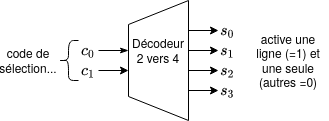

si $c_1c_0$ désigne son entrée et $s_3s_2s_1s_0$ sa sortie, sa table de vérité est alors: $$\begin{array}{cc|cccc}
c_1&c_0&s_3&s_2&s_1&s_0\cr\hline
0&0&0&0&0&1\cr
0&1&0&0&1&0\cr
1&0&0&1&0&0\cr
1&1&1&0&0&0
\end{array}$$

Ainsi, $s_0=\overline{c_1}\,\overline{c_0}$, $s_1=\overline{c_1}c_0$ etc.

In [2]:
%%HTML

<iframe width="600px" height="400px" src="https://circuitverse.org/simulator/embed/83784" id="projectPreview" scrolling="no" webkitAllowFullScreen mozAllowFullScreen allowFullScreen></iframe>

Nous allons voir une application de ce circuit pour la construction d'une UAL qui est un composant fondamental du processeur d'un ordinateur.

## Application: Unité Arithmétique et logique - UAL

Composant essentiel du processeur, cette unité a pour mission d'effectuer des opérations *élémentaires* sur ses entrées, principalement: le ET bit-à-bit, le OU bit-à-bit, l'inversion (NON) bit-à-bit et l'addition.

Elle est formée d'un *décodeur* (pour sélectionner une opération), d'une *unité logique* (pour le ET, OU, NON bit-à-bit) et d'un *additionneur*.

### UAL 1-bit

Voici un exemple d'UAL 1-bit - [explication de son fonctionnement](https://vimeo.com/414690577)

In [ ]:
%%HTML

<iframe width="600px" height="400px" src="https://circuitverse.org/simulator/embed/79002" id="projectPreview" scrolling="no" webkitAllowFullScreen mozAllowFullScreen allowFullScreen></iframe>

### UAL n-bit

En «chaînant» de façon approprié cette UAL 1-bit, on peut obtenir une UAL $n$-bits. Voici le schéma de principe pour quatre bits:

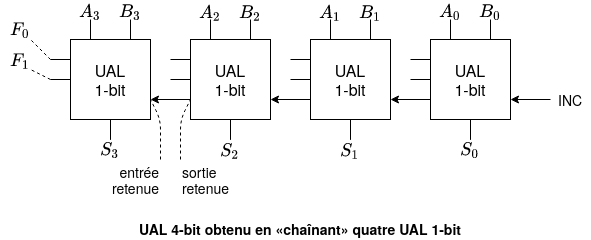

Et voici sa réalisation dans circuitVerse - [vidéo pour bien comprendre](https://vimeo.com/414722683):

In [ ]:
%%HTML

<iframe width="600px" height="400px" src="https://circuitverse.org/simulator/embed/83828" id="projectPreview" scrolling="no" webkitAllowFullScreen mozAllowFullScreen allowFullScreen></iframe>

Les bits de «contrôle» Sel (pour le décodeur), ENA (*enable A*), ENB, INVA (*INVerser A*) et INC (pour INCrément) permettent d'*ajuster* le comportement de l'UAL:

$$\begin{array}{c|ccccc}
\text{opérations}&Sel=F_1F_0&\text{ENA}&\text{ENB}&\text{INVA}&\text{INC}\cr
A~\text{ET}~B&00&1&1&0&\text{x}\cr
A~ \text{OR}~B &01&1&1&0&\text{x}\cr
\overline{B}&10&\text{x}&1&\text{x}&\text{x}\cr
A+B&11&1&1&0&0\cr
A+1&\dots &\dots &\dots &\dots &\dots\cr
\overline{A}&11&1&0&1&0\cr
-A&\dots&\dots &\dots &\dots &\dots\cr
B-A&\dots&\dots &\dots &\dots &\dots\cr
B+1&\dots&\dots &\dots &\dots &\dots
\end{array}$$
*Note*: «$\text{x}$» indique que la valeur du bit n'a pas d'importance.

#### Exercice 5

Dans le tableau précédent, en vous aidant du simulateur, trouver les valeurs manquantes afin de réaliser l'opération indiquée en première colonne. Voici quelques indices:
- $A+1$: penser à INC,
- $-A$ (en complément à 2!): rappelez vous des opérations du complément à 2,
- $B-A=B+(-A)$
____